---
title: "Kismetdb to Pandas"
permalink: /docs/readme/kismetdb_to_pandas/
excerpt: "Simple Analyis of Kismet DBs with Pandas"
toc: true
---

## What is Pandas?
Pandas is an expansive data-analysis and manipulation package for Python, built on numpy and matplotlib. It can be installed several ways, depending on your operating system.

It can be installed directly with PyPi and functions with both Python2 and Python3:	```  pip install pandas```

However, perhaps the easiest way is to install Anaconda, which includes dozens of packages for data science, data analysis, and the like: https://www.anaconda.com/

Anaconda includes the Jupyter Notebook, which is a web interface into IPython, or Interactive Python, and is more or less a mixture between a graphical Python interpreter and an IDE, allowing correction of errors, display of charts and graphics, and a mix of code and Markdown text. There are dozens of good tutorials on IPython/Jupyter available for free online. It allows saving all your work in "notebooks," which are files with an ```.ipynb``` extension for sharing with others or running later. Your work can also be exported in normal Python files, HTML, Markdown, etc.

Anaconda is available for Windows, Linux, and macOS. It installs all required dependencies in what is similar to a virtual Python environment, installed in its own folder structure. 


## Advantages of using Jupyter or IPython Notebooks
As mentioned, code can be run live in Jupyter, but unlike a normal interpreter, corrections can be made, state can be saved, multiple sessions/notebooks can be opened, comments and graphics can be added in order to make a very clean experience. No messy errors cluttering up the screen. The kernel can be halted and re-run as well if you wish.

All examples will be done in the Jupyter Notebook in this tutorial.


## Why Pandas?
Besides the numerous functions and methods Pandas has for manipulating and analyzing data, it also contains methods to read and write Excel files, CSV/TSV, XML, JSON, SQL/SQLite into and out of a Pandas "DataFrame." The DataFrame is somewhere between a 2D array and a live spreadsheet, able to be indexed, searched, filtered, and otherwise played with however you want.

Each DataFrame, like a table in a database, will have columns and entries. A DataFrame may have an index, similar to the primary key in an SQLite DB. The index may be whatever you want, such as a timestamp or a MAC Address, depending how you want to look at the data.

Data can be filtered, sorted, indexed, and whatnot on any of the columns. DataFrames can be deduplicated based on any one or all of the columns. They can be ordered and grouped by one or more of the column entries, depending on your goals.

I will cover some of the simple but useful ways Kismet database data can be manipulated in Pandas.


## Getting Started in the Jupyter Notebook
I will assume you already know how to run the Jupyter Notebook and these examples won't explain much background but should demonstrated some easy ways to use Kismet data.

Note: notebooks contain "cells" which can be run by hitting ```Shift-Enter``` or the Run button in the menu bar. This allows single lines or code blocks to be run at once.


In [2]:
#pandas is typically imported as "pd" because we're lazy
#sqlite3 is necessary to read the kismet sqlite database

import pandas as pd
import sqlite3

In [3]:
#set up path to db and establish normal sqlite connection
path = '../../../Kismet-20200222-17-07-56-1.kismet'
conn = sqlite3.connect(path)

#set an sql query
sql = 'SELECT * FROM devices;'

#use the query and connection to read the 'devices' table into a DataFrame called kismet
kismet = pd.read_sql_query(sql, conn)

In [7]:
kismet.head()

,first_time,last_time,devkey,phyname,devmac,strongest_signal,min_lat,min_lon,max_lat,max_lon,avg_lat,avg_lon,bytes_data,type,device
0,1582391282,1582391282,4202770D00000000_3FE2B8D999B60000,IEEE802.11,B6:99:D9:B8:E2:3F,-65,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism..."
1,1582391282,1582391282,4202770D00000000_1548E87904560000,IEEE802.11,56:04:79:E8:48:15,-81,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism..."
2,1582391282,1582391282,4202770D00000000_C93367EA2AE80000,IEEE802.11,E8:2A:EA:67:33:C9,-66,0.0,0.0,0.0,0.0,0.0,0.0,438,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Intel Corporat..."
3,1582391282,1582391282,4202770D00000000_638B03DCE3A0000,IEEE802.11,3A:CE:3D:B0:38:06,-80,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism..."
4,1582391282,1582391283,4202770D00000000_2D3BA15D58CE0000,IEEE802.11,CE:58:5D:A1:3B:2D,-68,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism..."


In [8]:
#check data by viewing the first five rows
#00:C0:CA:A7:1A:F9
kismet.loc[(kismet["devmac"] == "B6:99:D9:B8:E2:3F")].head()

,first_time,last_time,devkey,phyname,devmac,strongest_signal,min_lat,min_lon,max_lat,max_lon,avg_lat,avg_lon,bytes_data,type,device
0,1582391282,1582391282,4202770D00000000_3FE2B8D999B60000,IEEE802.11,B6:99:D9:B8:E2:3F,-65,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism..."


590
count    590.000000
mean     -67.447458
std       11.422275
min      -87.000000
25%      -75.000000
50%      -69.000000
75%      -61.000000
max      -37.000000
Name: strongest_signal, dtype: float64


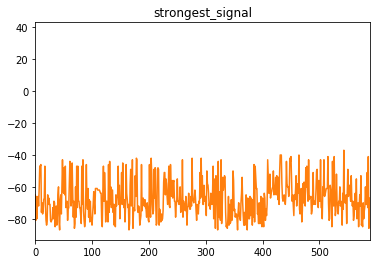

In [13]:

import matplotlib.pylab as plt
bins = range(-100, -30)
ax = plt.subplot()
kismet.hist(column="strongest_signal",bins=bins, ax=ax)
print(len(kismet["strongest_signal"]))
print(kismet["strongest_signal"].describe())
kismet["strongest_signal"].plot()
